Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [ ]:
import numpy as np
import pandas as pd
import time

start_time_pandas = time.time()
pandas_data = pd.DataFrame({
'Random Numbers': np.random.randint(1, 101, size=1_000_000)
})
pandas_time = time.time() - start_time_pandas

start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1_000_000)
numpy_time = time.time() - start_time_numpy

comparison_result = {
 'Pandas Time (seconds)': pandas_time,
 'NumPy Time (seconds)': numpy_time,
 'Faster Approach': 'Pandas' if pandas_time < numpy_time else 'NumPy'
}

print("Time taken by Pandas: {:.6f} seconds".format(pandas_time))
print("Time taken by NumPy: {:.6f} seconds".format(numpy_time))
print("Faster Approach:", comparison_result['Faster Approach'])

AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [5]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv('sleep_health.csv')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

start_time_pandas = time.time()
mean_values = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas Mean Calculation:")
print(mean_values)
end_time_pandas = time.time()

start_time_numpy = time.time()
mean_values_np = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].values.mean(axis=0)
print("NumPy Mean Calculation:")
print(mean_values_np)
end_time_numpy = time.time()

start_time_pandas_corr = time.time()
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
print("Pandas Correlation Matrix:")
print(correlation_matrix)

corr_sleep_duration_age = correlation_matrix['Sleep Duration']['Age']
corr_sleep_duration_heart_rate = correlation_matrix['Sleep Duration']['Heart Rate']
corr_sleep_duration_daily_steps = correlation_matrix['Sleep Duration']['Daily Steps']
print("Pandas Correlation Calculations:")
print(f"Correlation Sleep Duration & Age: {corr_sleep_duration_age}")
print(f"Correlation Sleep Duration & Heart Rate: {corr_sleep_duration_heart_rate}")
print(f"Correlation Sleep Duration & Daily Steps: {corr_sleep_duration_daily_steps}")
end_time_pandas_corr = time.time()

start_time_numpy_corr = time.time()
data = df.select_dtypes(include=[np.number])[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']].values
corr_sleep_duration_age_np = np.corrcoef(data[:, 0], data[:, 1])[0, 1]
corr_sleep_duration_heart_rate_np = np.corrcoef(data[:, 0], data[:, 2])[0, 1]
corr_sleep_duration_daily_steps_np = np.corrcoef(data[:, 0], data[:, 3])[0, 1]
print("NumPy Correlation Calculations:")
print(f"Correlation Sleep Duration & Age: {corr_sleep_duration_age_np}")
print(f"Correlation Sleep Duration & Heart Rate: {corr_sleep_duration_heart_rate_np}")
print(f"Correlation Sleep Duration & Daily Steps: {corr_sleep_duration_daily_steps_np}")
end_time_numpy_corr = time.time()

std_sleep_duration_pandas = df['Sleep Duration'].std()
print(f"Pandas Standard Deviation Sleep Duration: {std_sleep_duration_pandas}")

std_sleep_duration_np = np.std(df['Sleep Duration'].values)
print(f"NumPy Standard Deviation Sleep Duration: {std_sleep_duration_np}")

print("Time difference (Pandas vs NumPy):")
print(f"Pandas Mean Time: {end_time_pandas - start_time_pandas} seconds")
print(f"NumPy Mean Time: {end_time_numpy - start_time_numpy} seconds")
print(f"Pandas Correlation Time: {end_time_pandas_corr - start_time_pandas_corr} seconds")
print(f"NumPy Correlation Time: {end_time_numpy_corr - start_time_numpy_corr} seconds")



Pandas Mean Calculation:
Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy Mean Calculation:
[   7.13208556  128.55347594   84.64973262   70.1657754  6816.84491979]
Pandas Correlation Matrix:
                          Person ID       Age  Sleep Duration  \
Person ID                  1.000000  0.990516        0.296305   
Age                        0.990516  1.000000        0.344709   
Sleep Duration             0.296305  0.344709        1.000000   
Quality of Sleep           0.431612  0.473734        0.883213   
Physical Activity Level    0.149882  0.178993        0.212360   
Stress Level              -0.394287 -0.422344       -0.811023   
Systolic blood pressure    0.611551  0.605878       -0.180406   
Diastolic blood pressure   0.590670  0.593839       -0.166570   
Heart Rate                -0.225467 -0.225606       

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

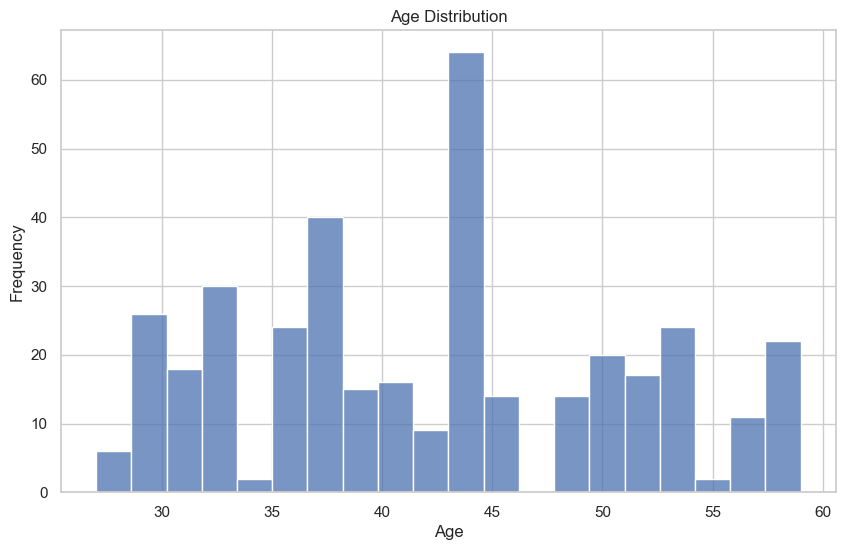

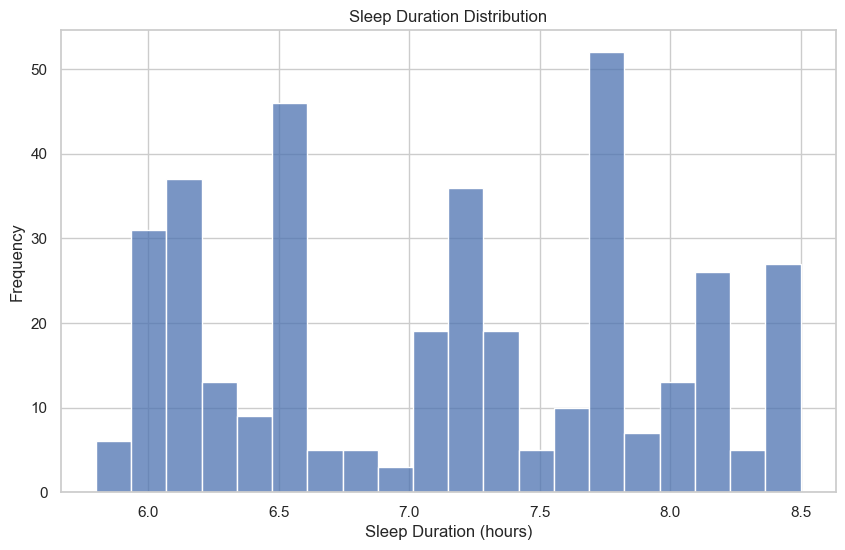

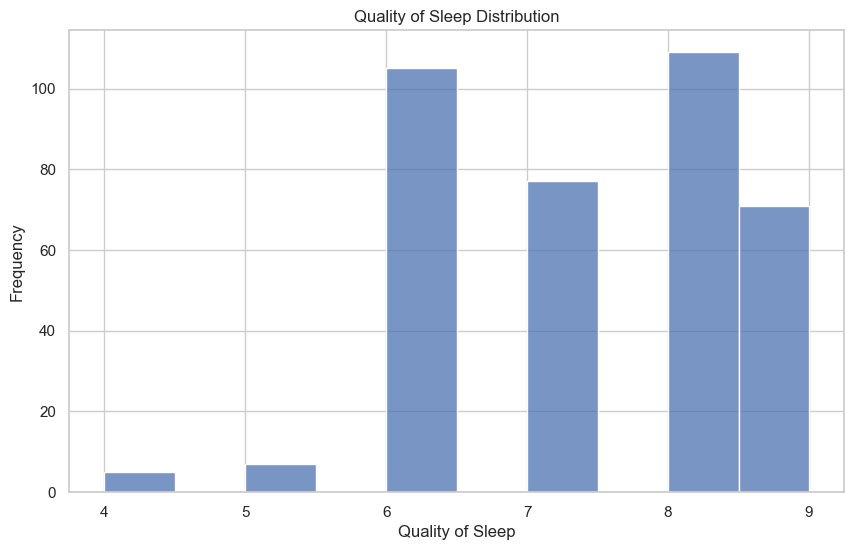

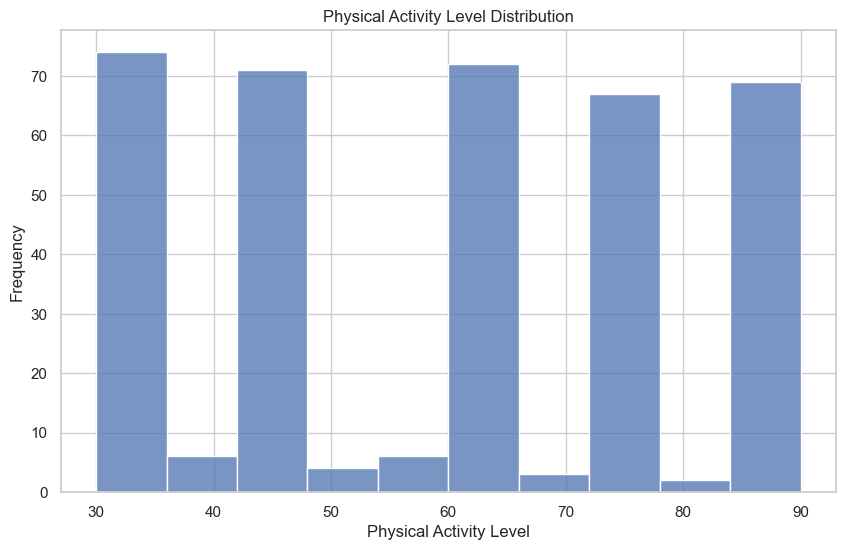

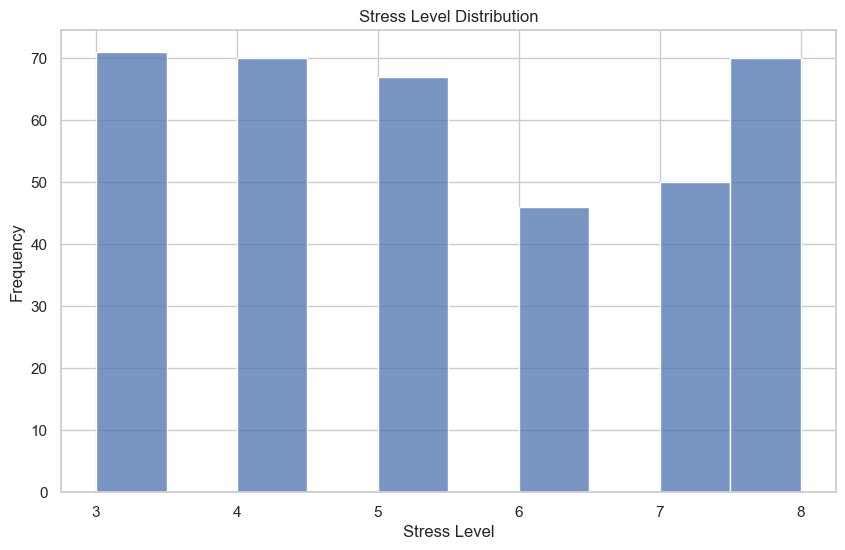

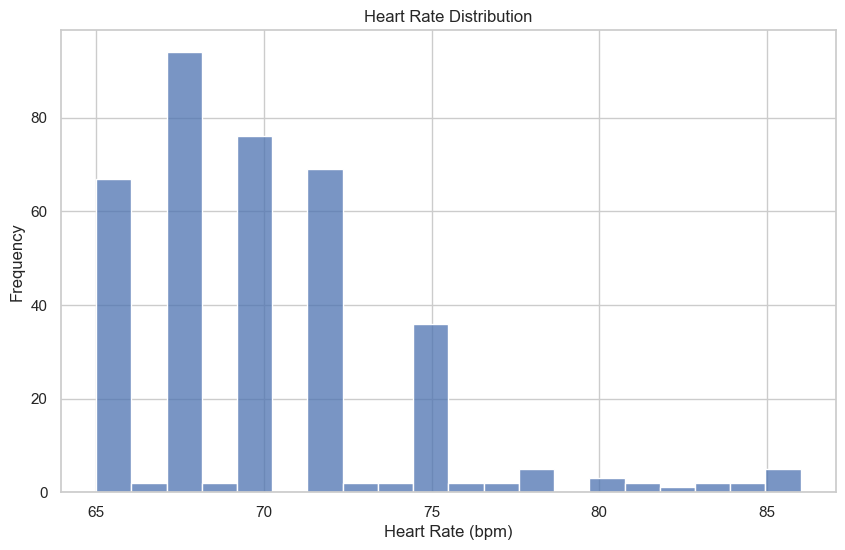

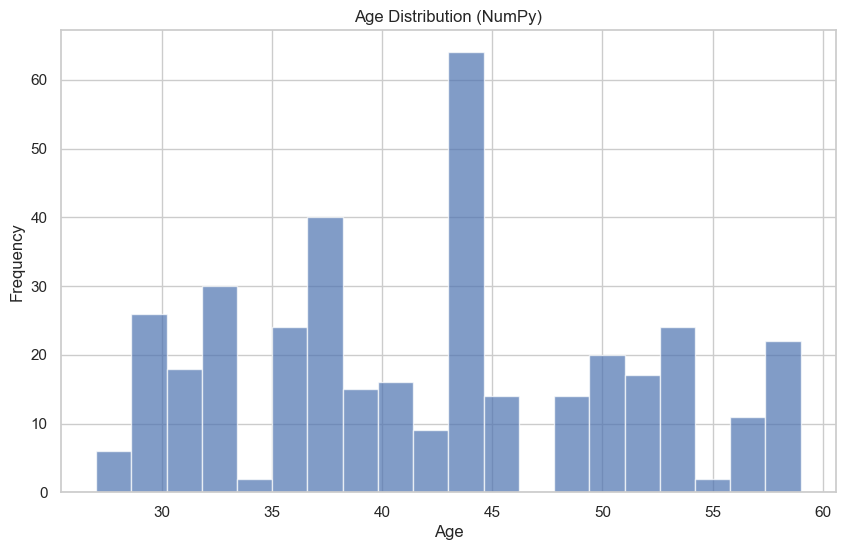

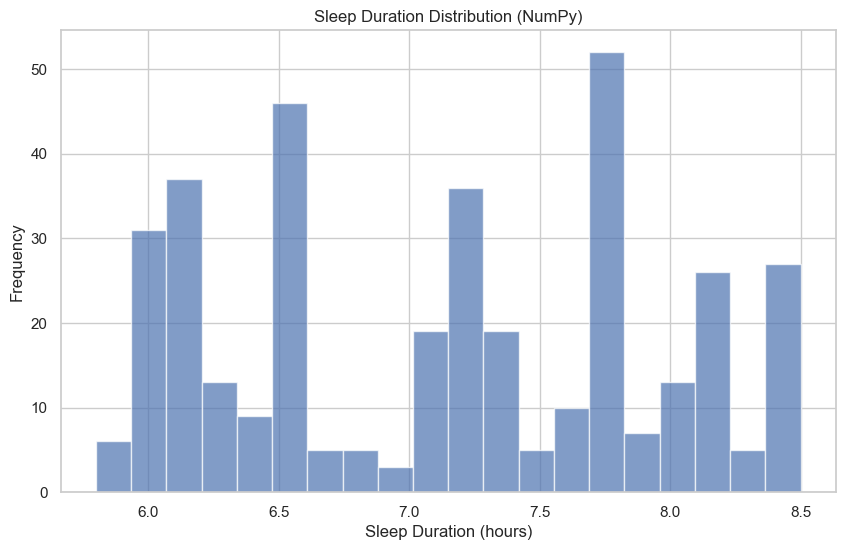

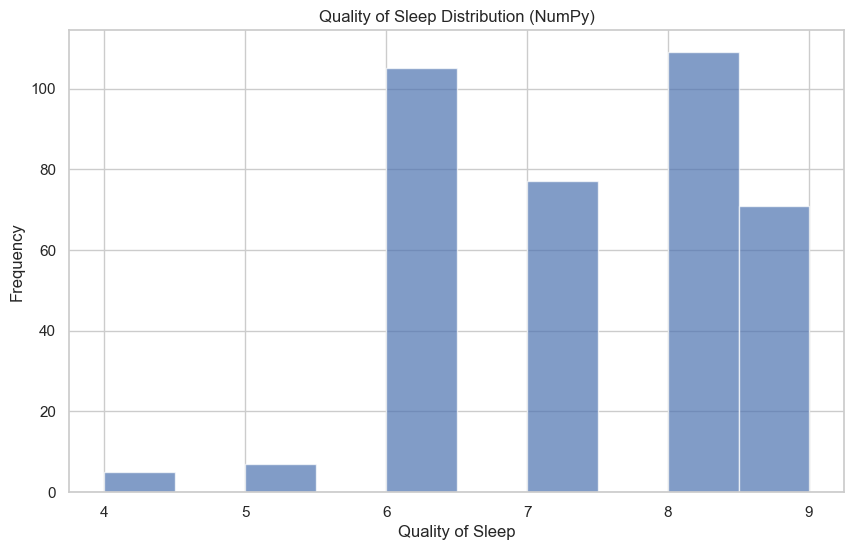

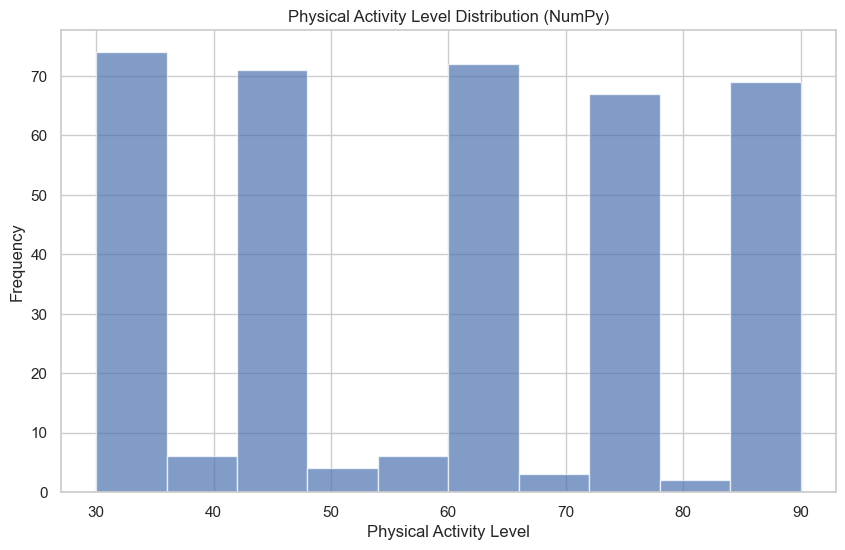

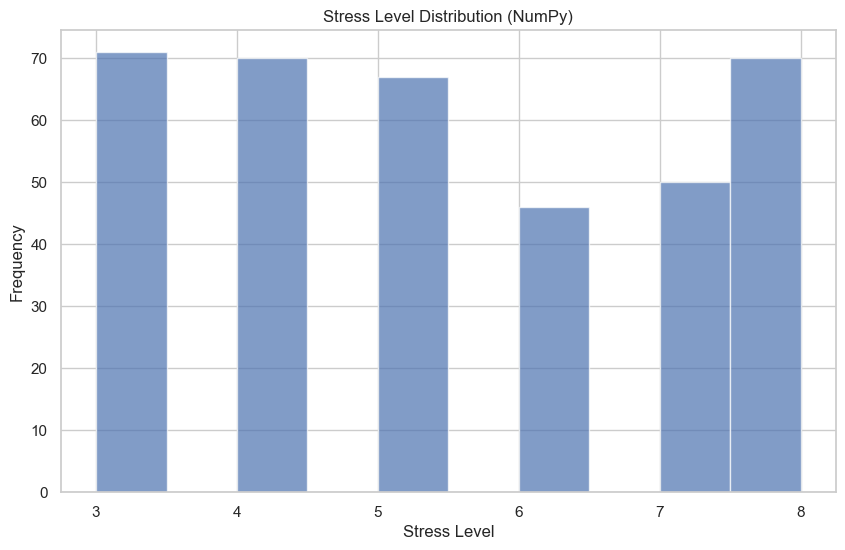

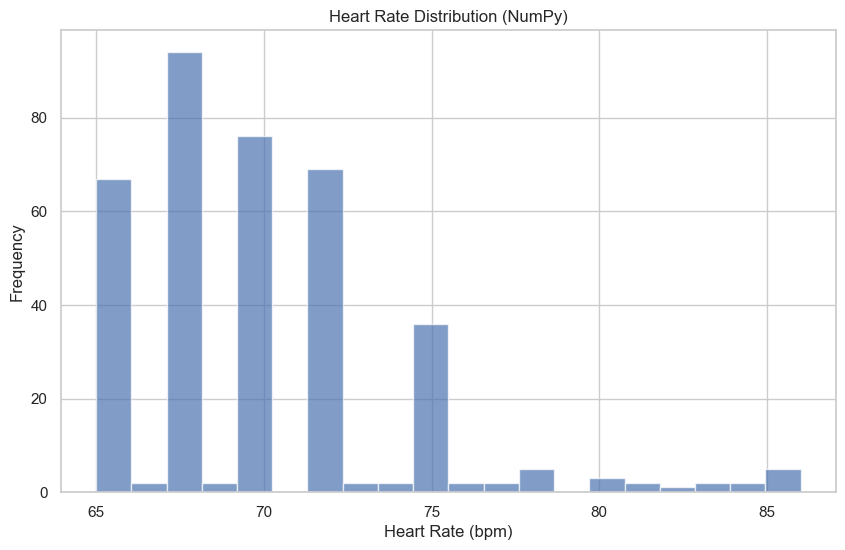

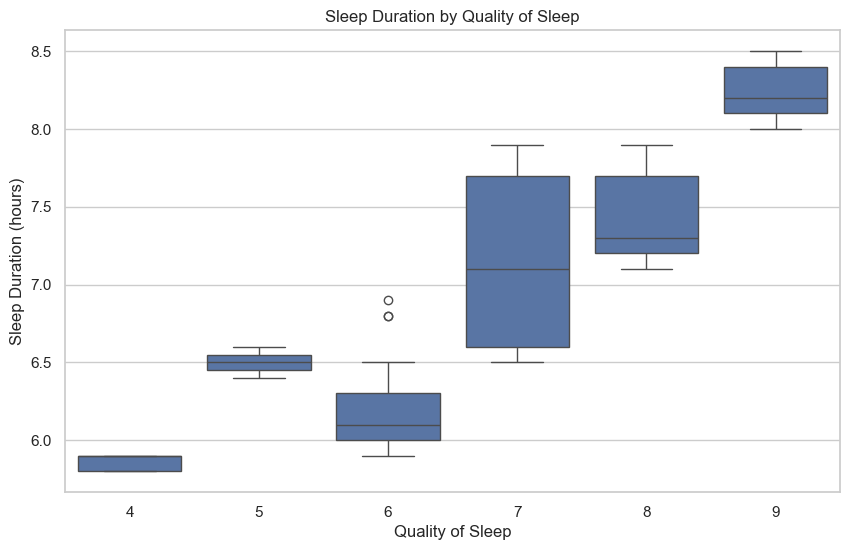

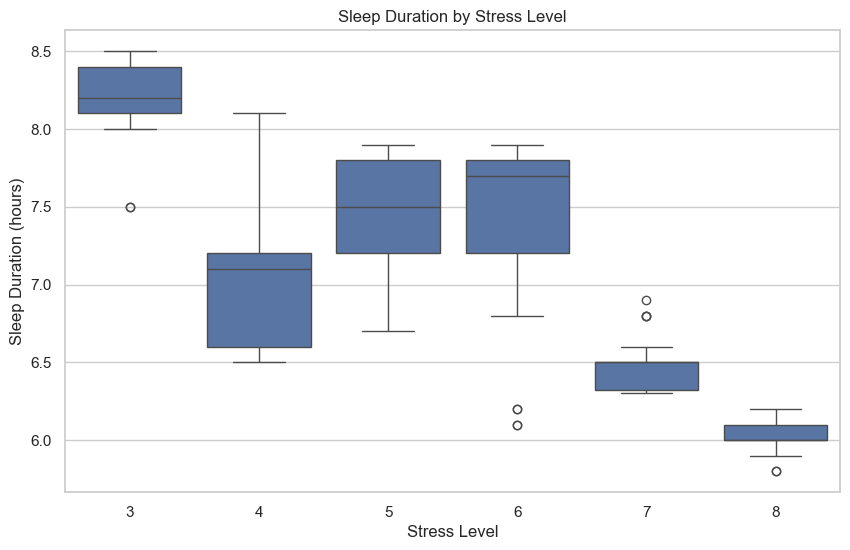

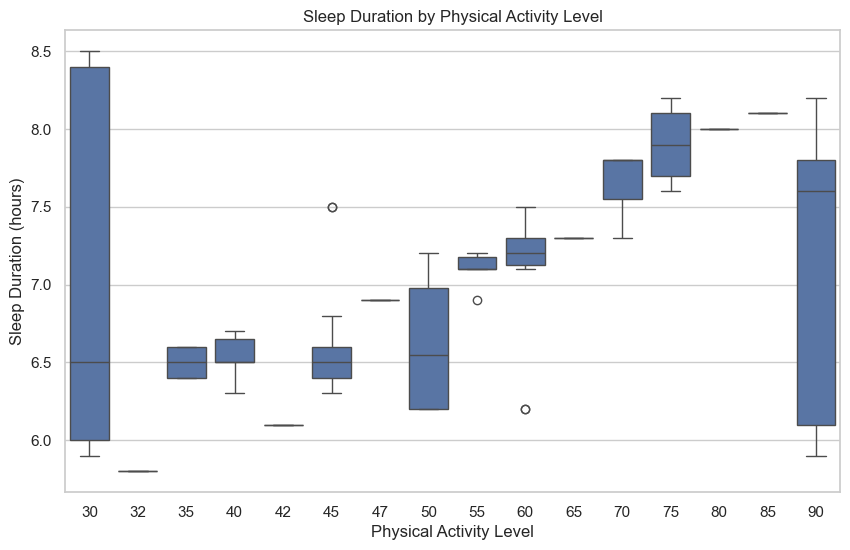

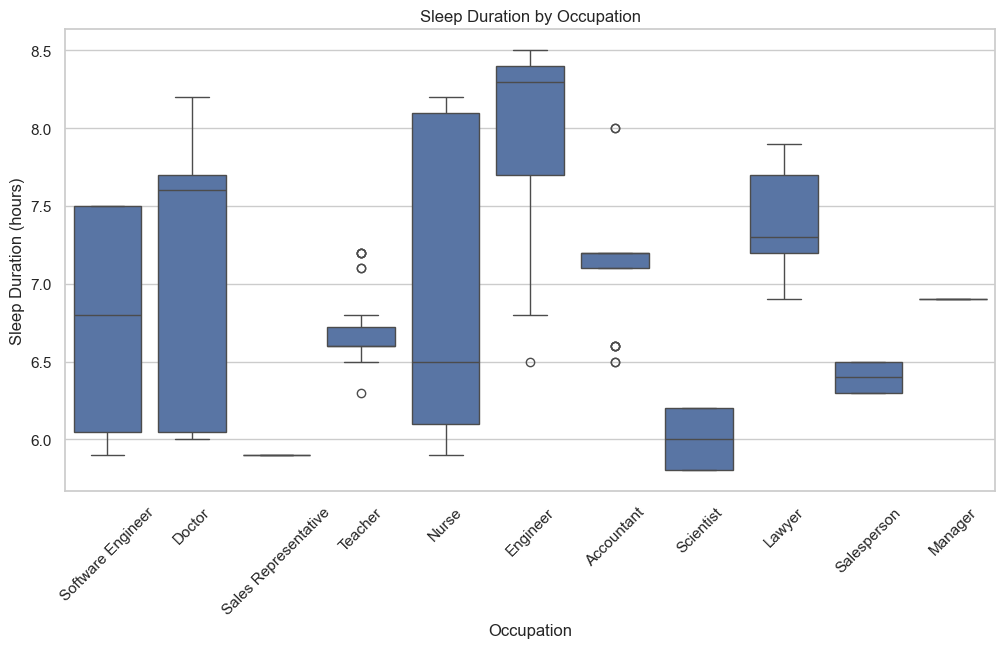

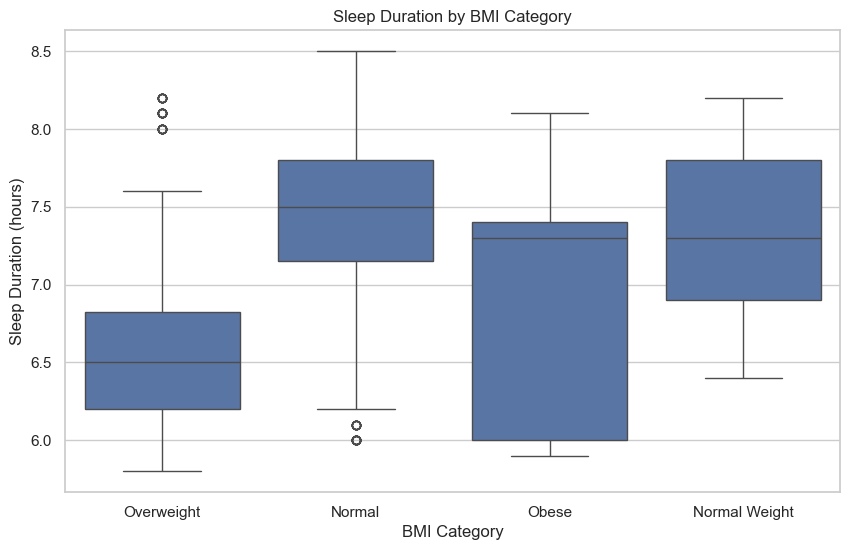

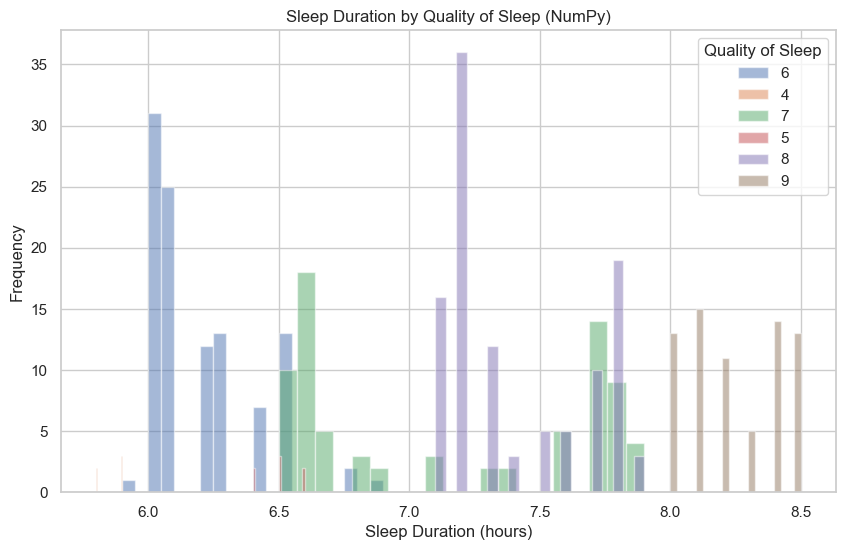

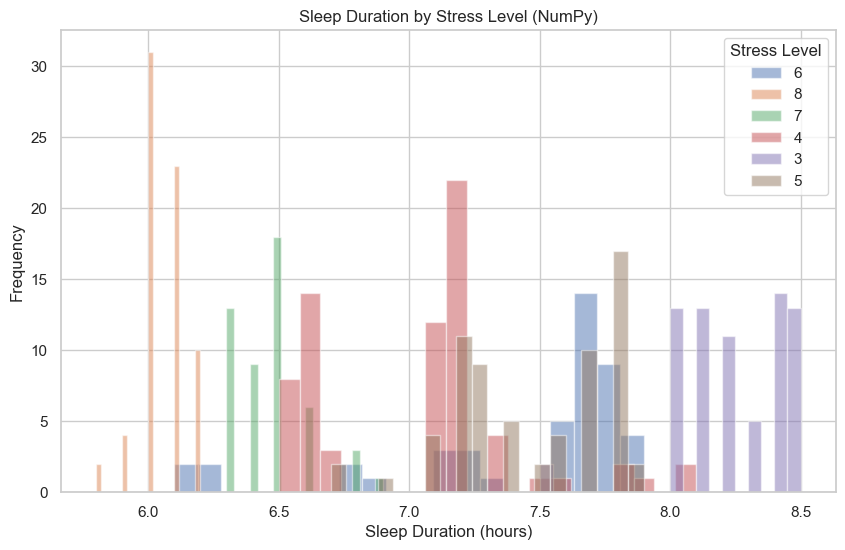

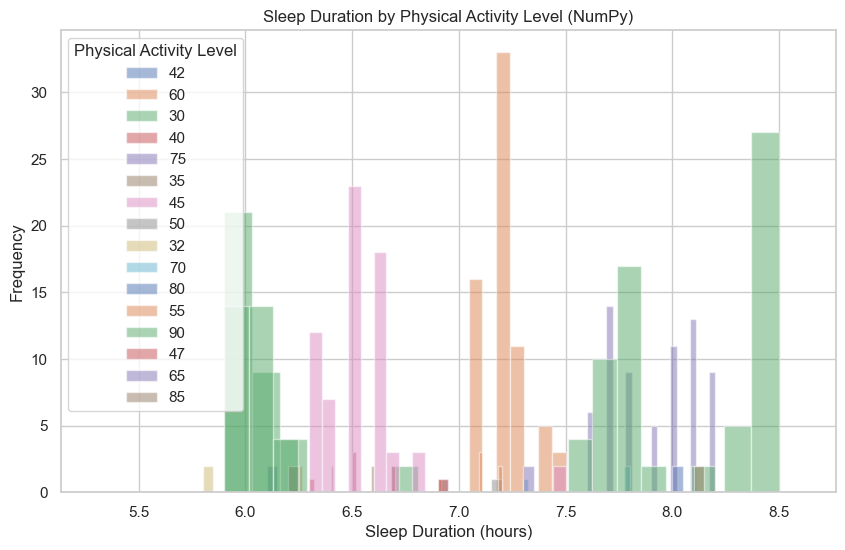

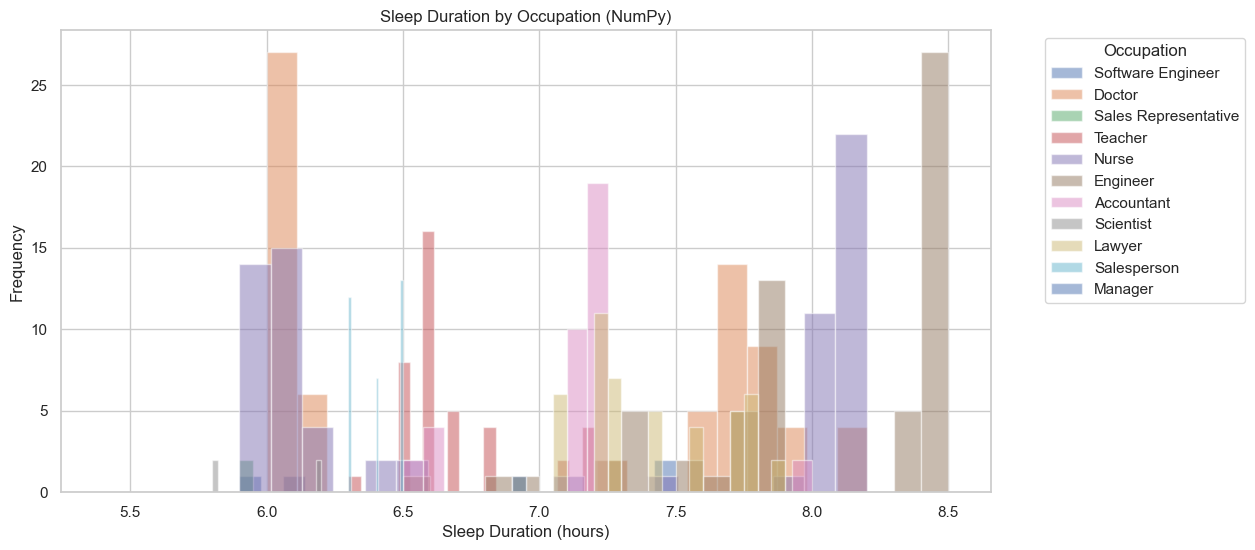

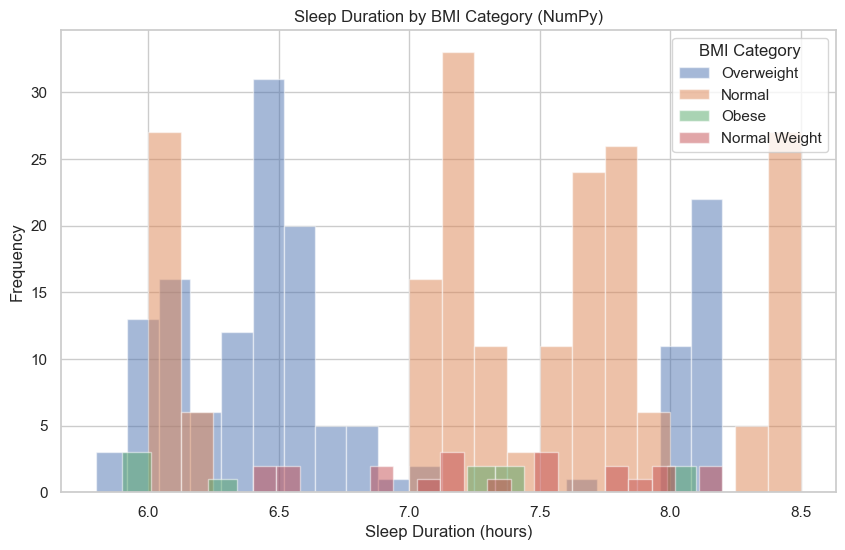

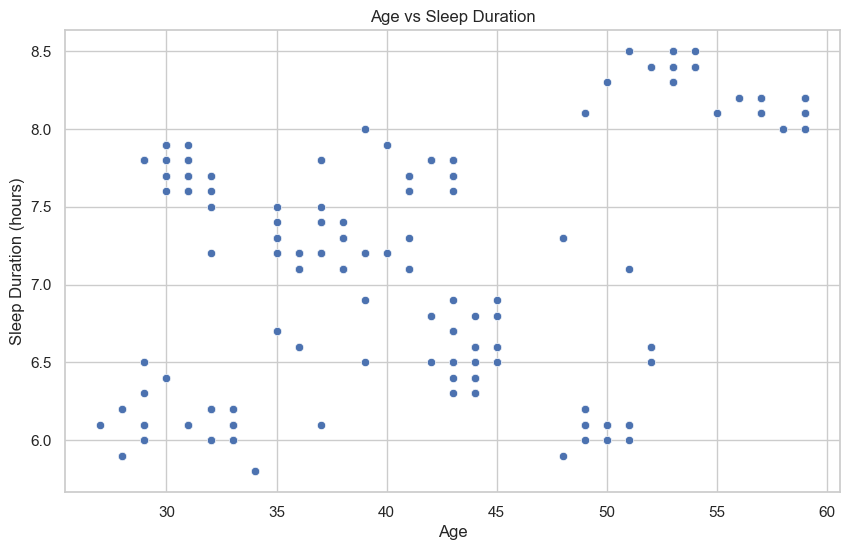

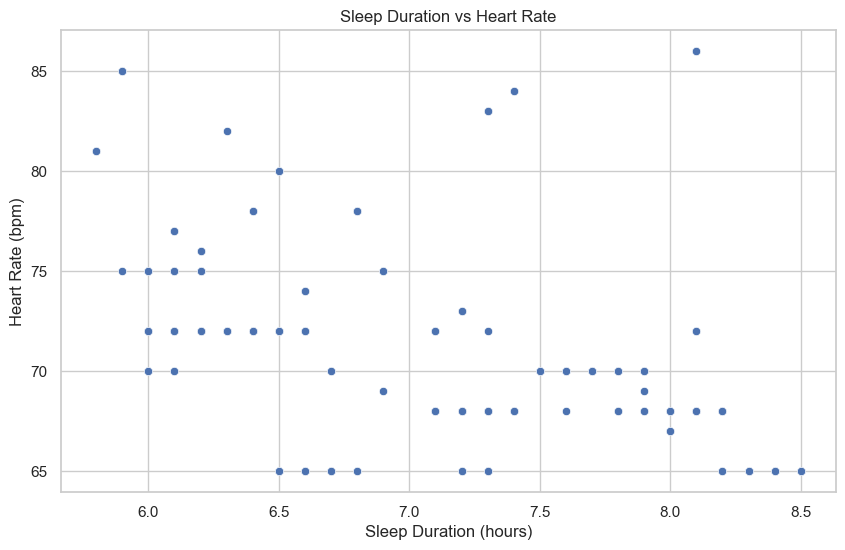

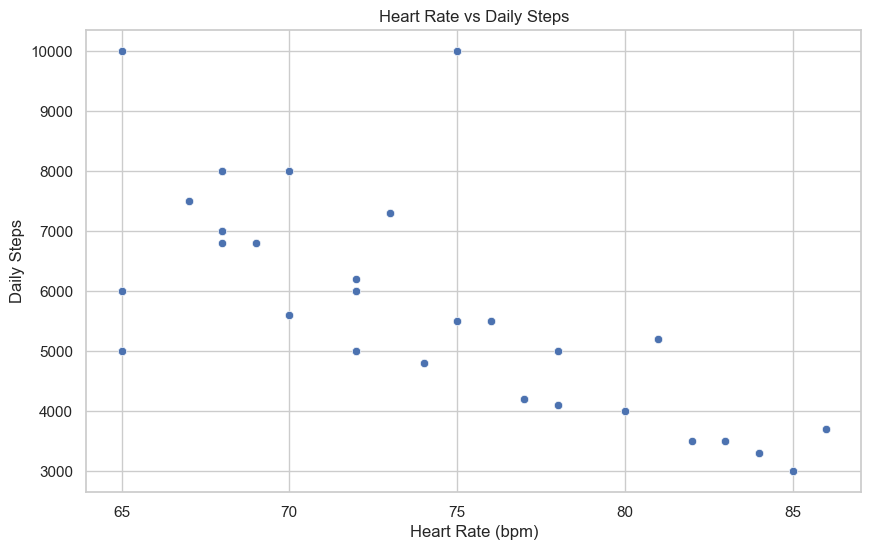

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

url = 'https://raw.githubusercontent.com/OludolapoAnalyst/Sleep-and-Lifestyle-Dataset/main/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(url)

sns.set(style="whitegrid")

start_time_pandas = time.time()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=20)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], bins=10)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], bins=10)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], bins=10)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], bins=20)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

start_time_numpy = time.time()

age_counts, age_bins = np.histogram(df['Age'], bins=20)
sleep_duration_counts, sleep_duration_bins = np.histogram(df['Sleep Duration'], bins=20)
quality_of_sleep_counts, quality_of_sleep_bins = np.histogram(df['Quality of Sleep'], bins=10)
physical_activity_counts, physical_activity_bins = np.histogram(df['Physical Activity Level'], bins=10)
stress_level_counts, stress_level_bins = np.histogram(df['Stress Level'], bins=10)
heart_rate_counts, heart_rate_bins = np.histogram(df['Heart Rate'], bins=20)

plt.figure(figsize=(10, 6))
plt.hist(age_bins[:-1], age_bins, weights=age_counts, alpha=0.7)
plt.title('Age Distribution (NumPy)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(sleep_duration_bins[:-1], sleep_duration_bins, weights=sleep_duration_counts, alpha=0.7)
plt.title('Sleep Duration Distribution (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(quality_of_sleep_bins[:-1], quality_of_sleep_bins, weights=quality_of_sleep_counts, alpha=0.7)
plt.title('Quality of Sleep Distribution (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(physical_activity_bins[:-1], physical_activity_bins, weights=physical_activity_counts, alpha=0.7)
plt.title('Physical Activity Level Distribution (NumPy)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(stress_level_bins[:-1], stress_level_bins, weights=stress_level_counts, alpha=0.7)
plt.title('Stress Level Distribution (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(heart_rate_bins[:-1], heart_rate_bins, weights=heart_rate_counts, alpha=0.7)
plt.title('Heart Rate Distribution (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
for q in df['Quality of Sleep'].unique():
 plt.hist(df['Sleep Duration'][df['Quality of Sleep'] == q], bins=20, alpha=0.5, label=str(q))
plt.title('Sleep Duration by Quality of Sleep (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend(title='Quality of Sleep')
plt.show()

plt.figure(figsize=(10, 6))
for s in df['Stress Level'].unique():
 plt.hist(df['Sleep Duration'][df['Stress Level'] == s], bins=20, alpha=0.5, label=str(s))
plt.title('Sleep Duration by Stress Level (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend(title='Stress Level')
plt.show()
plt.figure(figsize=(10, 6))
for p in df['Physical Activity Level'].unique():
 plt.hist(df['Sleep Duration'][df['Physical Activity Level'] == p], bins=20, alpha=0.5, label=str(p))
plt.title('Sleep Duration by Physical Activity Level (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend(title='Physical Activity Level')
plt.show()

plt.figure(figsize=(12, 6))
for occ in df['Occupation'].unique():
 plt.hist(df['Sleep Duration'][df['Occupation'] == occ], bins=20, alpha=0.5, label=str(occ))
plt.title('Sleep Duration by Occupation (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
for bmi in df['BMI Category'].unique():
 plt.hist(df['Sleep Duration'][df['BMI Category'] == bmi], bins=20, alpha=0.5, label=str(bmi))
plt.title('Sleep Duration by BMI Category (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend(title='BMI Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

ages = data['Age'].values
sleep_durations = data['Sleep Duration'].values
plt.figure(figsize=(10, 6))
plt.scatter(ages, sleep_durations, alpha=0.7)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

heart_rates = data['Heart Rate'].values
plt.figure(figsize=(10, 6))
plt.scatter(sleep_durations, heart_rates, alpha=0.7)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

daily_steps = data['Daily Steps'].values
plt.figure(figsize=(10, 6))
plt.scatter(heart_rates, daily_steps, alpha=0.7)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(sleep_durations, daily_steps, alpha=0.7)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

print(f"Pandas绘图时间: {pandas_time:.4f}秒")
print(f"NumPy绘图时间: {numpy_time:.4f}秒")

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



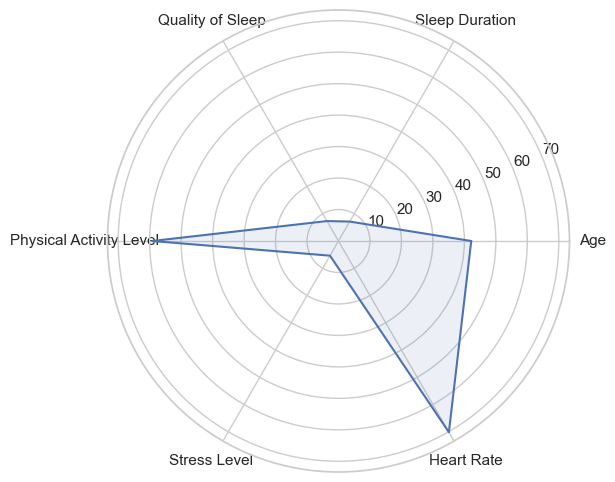

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.express as px
from pandas.plotting import parallel_coordinates
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool

data = pd.read_csv('sleep_health.csv')

attributes = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
values = data[attributes].mean()
angles = [n / float(len(attributes)) * 2 * pi for n in range(len(attributes))]
angles += angles[:1]
values = np.concatenate((values, [values.iloc[0]])) 

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.plot(angles, values)
ax.fill(angles, values, 'b', alpha=0.1)
plt.xticks(angles[:-1], attributes)
plt.show()